#DSC 672 Project by Vikram Kalister and Shreyas Ravi

## Importing Packages

In [110]:
import sklearn
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sklearn.__version__

'1.1.1'

In [ ]:
pip install imblearn

In [111]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [112]:
data = pd.read_csv('cardio_train-1.csv', sep = ";")

In [113]:
data.shape

(70000, 13)

In [114]:
df = data.sample(frac=0.25)

In [115]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
17587,25120,19030,2,170,76.0,120,70,1,1,1,1,1,0
51184,73010,21089,2,169,63.0,130,80,2,3,1,0,1,1
12357,17647,21902,1,168,103.0,145,95,2,1,0,0,1,1
31109,44412,14477,1,162,60.0,130,90,3,3,0,0,0,1
9544,13595,23261,1,160,65.0,130,90,1,1,0,0,1,1


In [67]:
df.shape

(17500, 13)

In [211]:
df1 = df

In [116]:
df.info()
df["age"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17500 entries, 17587 to 63733
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17500 non-null  int64  
 1   age          17500 non-null  int64  
 2   gender       17500 non-null  int64  
 3   height       17500 non-null  int64  
 4   weight       17500 non-null  float64
 5   ap_hi        17500 non-null  int64  
 6   ap_lo        17500 non-null  int64  
 7   cholesterol  17500 non-null  int64  
 8   gluc         17500 non-null  int64  
 9   smoke        17500 non-null  int64  
 10  alco         17500 non-null  int64  
 11  active       17500 non-null  int64  
 12  cardio       17500 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 1.9 MB


17587    19030
51184    21089
12357    21902
31109    14477
9544     23261
         ...  
12756    19001
40487    21919
47269    22441
64494    23071
63733    19487
Name: age, Length: 17500, dtype: int64

In [117]:
df["Age"] = df["age"]/365
del df["age"]
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age
17587,25120,2,170,76.0,120,70,1,1,1,1,1,0,52.136986
51184,73010,2,169,63.0,130,80,2,3,1,0,1,1,57.778082
12357,17647,1,168,103.0,145,95,2,1,0,0,1,1,60.005479
31109,44412,1,162,60.0,130,90,3,3,0,0,0,1,39.663014
9544,13595,1,160,65.0,130,90,1,1,0,0,1,1,63.728767


In [118]:
df['height'] = df['height']/100

In [119]:
df['height']

17587    1.70
51184    1.69
12357    1.68
31109    1.62
9544     1.60
         ... 
12756    1.60
40487    1.64
47269    1.72
64494    1.55
63733    1.55
Name: height, Length: 17500, dtype: float64

In [120]:
df['bmi'] = df['weight']/((df['height'])**2)

In [121]:
del df['weight']
del df['height']

In [122]:
df.head()

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,bmi
17587,25120,2,120,70,1,1,1,1,1,0,52.136986,26.297578
51184,73010,2,130,80,2,3,1,0,1,1,57.778082,22.058051
12357,17647,1,145,95,2,1,0,0,1,1,60.005479,36.493764
31109,44412,1,130,90,3,3,0,0,0,1,39.663014,22.862369
9544,13595,1,130,90,1,1,0,0,1,1,63.728767,25.390625


In [123]:
 df['bmi']

17587    26.297578
51184    22.058051
12357    36.493764
31109    22.862369
9544     25.390625
           ...    
12756    30.859375
40487    22.679952
47269    26.703624
64494    31.633715
63733    31.633715
Name: bmi, Length: 17500, dtype: float64

In [124]:
df["age"] = df["Age"].round()
del df["Age"]
del df['id']
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
17587,2,120,70,1,1,1,1,1,0,26.297578,52.0
51184,2,130,80,2,3,1,0,1,1,22.058051,58.0
12357,1,145,95,2,1,0,0,1,1,36.493764,60.0
31109,1,130,90,3,3,0,0,0,1,22.862369,40.0
9544,1,130,90,1,1,0,0,1,1,25.390625,64.0


In [125]:
df['bmi'] = df['bmi'].round()
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
17587,2,120,70,1,1,1,1,1,0,26.0,52.0
51184,2,130,80,2,3,1,0,1,1,22.0,58.0
12357,1,145,95,2,1,0,0,1,1,36.0,60.0
31109,1,130,90,3,3,0,0,0,1,23.0,40.0
9544,1,130,90,1,1,0,0,1,1,25.0,64.0


In [126]:
df = df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]]
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
17587,2,120,70,1,1,1,1,1,0,26.0,52.0
51184,2,130,80,2,3,1,0,1,1,22.0,58.0
12357,1,145,95,2,1,0,0,1,1,36.0,60.0
31109,1,130,90,3,3,0,0,0,1,23.0,40.0
9544,1,130,90,1,1,0,0,1,1,25.0,64.0


In [127]:
scaler = MinMaxScaler()

In [128]:
df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]] = scaler.fit_transform(df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]])

In [129]:
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
17587,1.0,0.016973,0.006364,0.0,0.0,1.0,1.0,1.0,0.0,0.078261,0.628571
51184,1.0,0.017680,0.007273,0.5,1.0,1.0,0.0,1.0,1.0,0.060870,0.800000
12357,0.0,0.018741,0.008636,0.5,0.0,0.0,0.0,1.0,1.0,0.121739,0.857143
31109,0.0,0.017680,0.008182,1.0,1.0,0.0,0.0,0.0,1.0,0.065217,0.285714
9544,0.0,0.017680,0.008182,0.0,0.0,0.0,0.0,1.0,1.0,0.073913,0.971429


Text(0.5, 1.0, 'Correlation Plot')

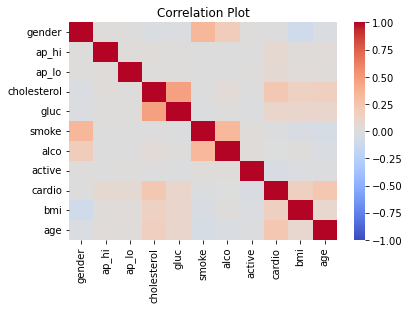

In [130]:
sns.heatmap(data = df.corr(), vmin = -1, vmax = 1, cmap = "coolwarm")
plt.title("Correlation Plot")

Text(0.5, 1.0, 'Presence of CVD based on Activity')

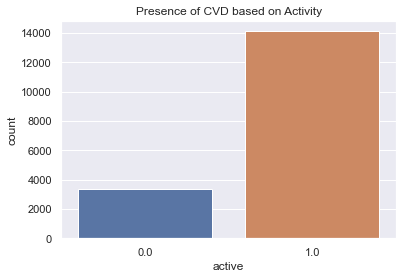

In [136]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="active", data=df)
plt.title("Presence of CVD based on Activity")


<AxesSubplot:xlabel='active', ylabel='count'>

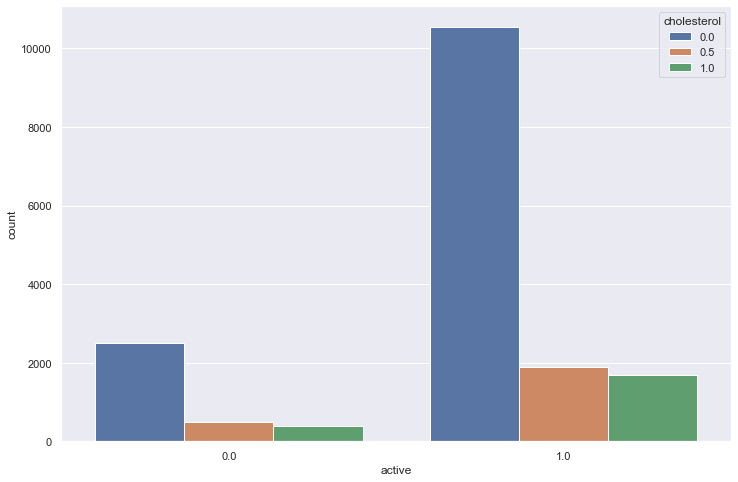

In [142]:
# YOUR CODE
plt.figure(figsize=(12,8))
sns.countplot(x="active", data=df, hue='cholesterol')

<AxesSubplot:xlabel='alco', ylabel='count'>

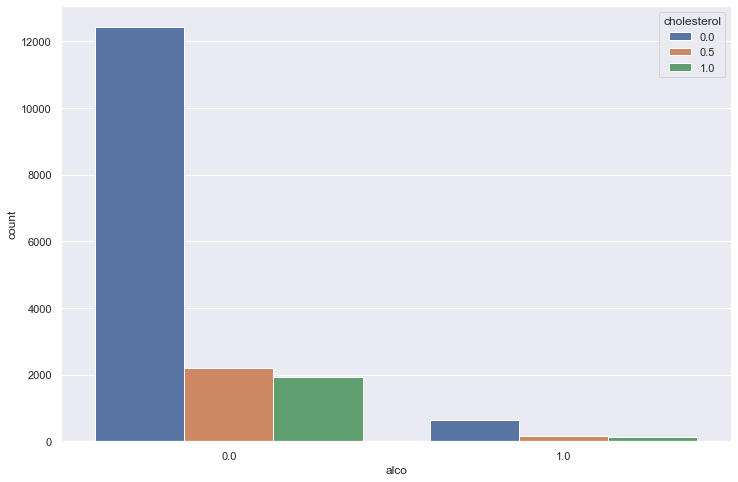

In [144]:
plt.figure(figsize=(12,8))
sns.countplot(x="alco", data=df, hue='cholesterol')

<AxesSubplot:xlabel='smoke', ylabel='count'>

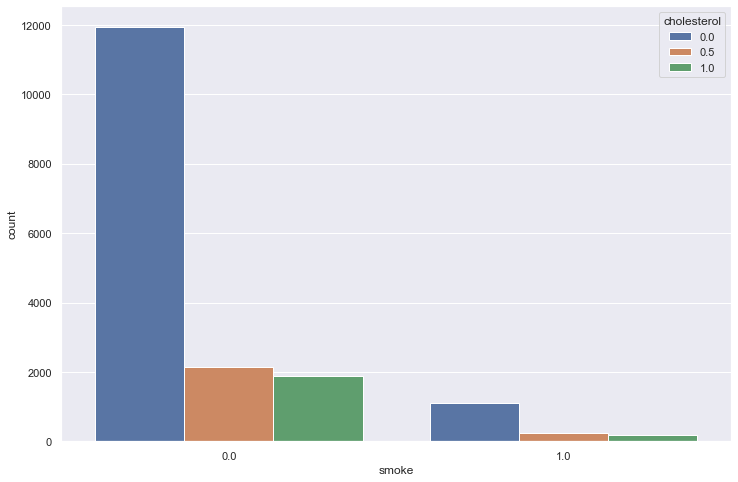

In [145]:
plt.figure(figsize=(12,8))
sns.countplot(x="smoke", data=df, hue='cholesterol')

In [148]:
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
17587,1.0,0.016973,0.006364,0.0,0.0,1.0,1.0,1.0,0.0,0.078261,0.628571
51184,1.0,0.017680,0.007273,0.5,1.0,1.0,0.0,1.0,1.0,0.060870,0.800000
12357,0.0,0.018741,0.008636,0.5,0.0,0.0,0.0,1.0,1.0,0.121739,0.857143
31109,0.0,0.017680,0.008182,1.0,1.0,0.0,0.0,0.0,1.0,0.065217,0.285714
9544,0.0,0.017680,0.008182,0.0,0.0,0.0,0.0,1.0,1.0,0.073913,0.971429


<AxesSubplot:xlabel='cholesterol', ylabel='count'>

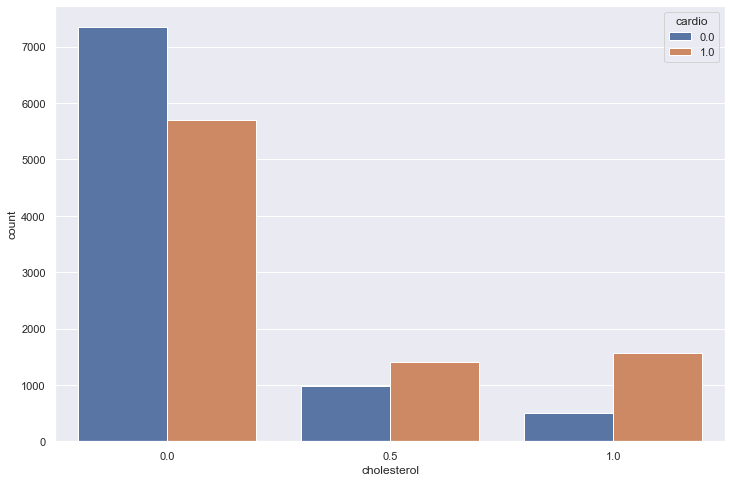

In [207]:
plt.figure(figsize=(12,8))
sns.countplot(x="cholesterol", data=df, hue='cardio')

Text(0.5, 1.0, 'Presence of Heart Disease based on activity')

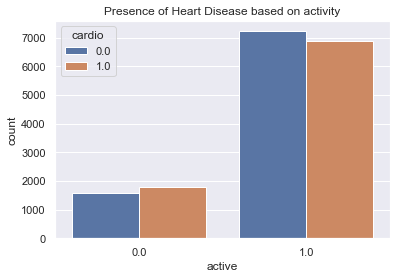

In [138]:
sns.countplot(x = "active", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on activity")

<AxesSubplot:xlabel='age', ylabel='count'>

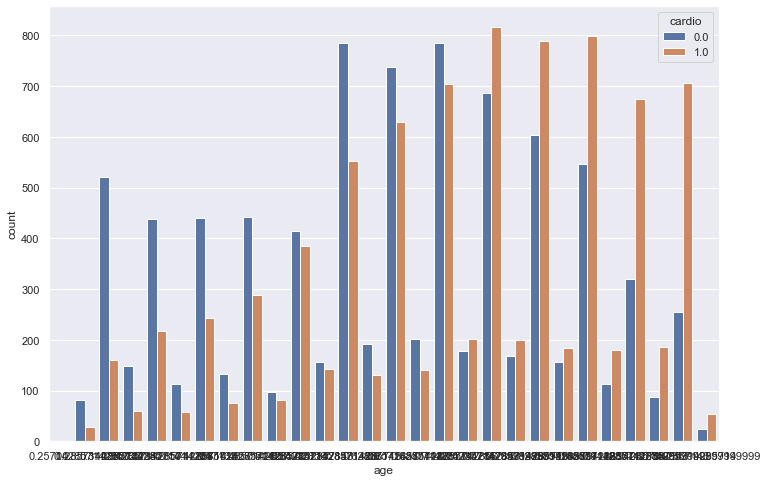

In [212]:
plt.figure(figsize=(12,8))
sns.countplot(x="age", data=df1, hue='cardio')

Text(0.5, 1.0, 'Presence of Heart Disease based on cholesterol')

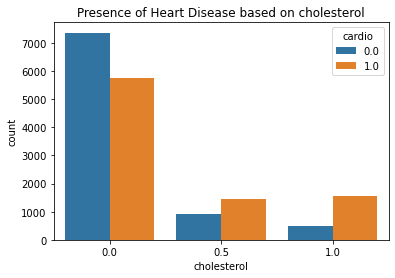

In [85]:
sns.countplot(x = "cholesterol", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on cholesterol")

In [86]:
X = df.drop("cardio", axis = 1)
y = df["cardio"]

## Multicolinearity & Feature Selection

In [27]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
"""""X = df[list(df.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)'"""""
#High VIF indicates that there's multicollinearity

'""X = df[list(df.columns)]\nvif_info = pd.DataFrame()\nvif_info[\'VIF\'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nvif_info[\'Column\'] = X.columns\nvif_info.sort_values(\'VIF\', ascending=False)\''

## Models Used
1. Decision Trees
2. Random Forest Classifier
3. Naive Bayes
4. Support Vector Machines (SVM)
5. Support Vector Machines (PCA)
6. Bayesian Analysis

## Preparing Data for Machine Learning

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

### SMOTE

In [154]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (17500, 10)
Shape of X after SMOTE: (17502, 10)


In [155]:
rf = RandomForestClassifier()

In [156]:
rf.fit(X_sm, y_sm)

RandomForestClassifier()

In [157]:
predrfc = rf.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = predrfc)

0.9222857142857143

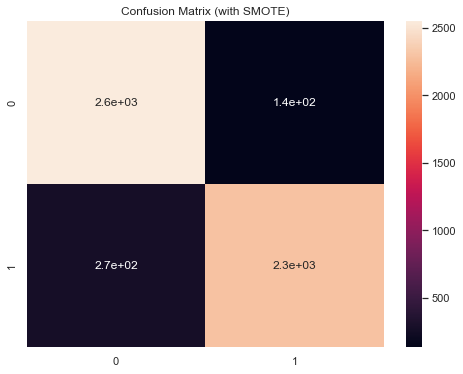

In [158]:
cm = confusion_matrix(y_test, predrfc)
plt.figure(figsize = (8, 6))
plt.title('Confusion Matrix (with SMOTE)')
sns.heatmap(cm, annot = True, cmap = 'rocket');

## Decision Trees

In [93]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [94]:
dt = DecisionTreeClassifier()

In [95]:
dt.fit(X_sm, y_sm)

DecisionTreeClassifier()

In [96]:
pred_train = dt.predict(X_sm)

In [97]:
print("Accuracy Train", metrics.accuracy_score(y_sm, pred_train))

Accuracy Train 0.9177808250485658


In [98]:
pred = dt.predict(X_test)

In [99]:
print("Accuracy Test", metrics.accuracy_score(y_test, pred))

Accuracy Test 0.9226666666666666


In [100]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2685
         1.0       0.97      0.87      0.92      2565

    accuracy                           0.92      5250
   macro avg       0.93      0.92      0.92      5250
weighted avg       0.93      0.92      0.92      5250



### Grid Search for Decision Trees

In [52]:
parameters = {
    "criterion": ['gini', 'entropy'], 
    "max_depth": [10, 50, 100, 200], 
    "min_samples_split": range(2, 12),
    "min_samples_leaf": range(1, 5)
}

In [53]:
grid_dt = GridSearchCV(dt, parameters, cv = 3, n_jobs = -1)

In [54]:
grid_dt.fit(X_sm, y_sm)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100, 200],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 12)})

In [55]:
grid_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=9)

In [56]:
dtcv = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=9)

In [57]:
dtcv.fit(X_sm, y_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=9)

In [58]:
dtcv_pred = dtcv.predict(X_test)

In [59]:
print(confusion_matrix(y_test, dtcv_pred))

[[1981  598]
 [ 700 1971]]


In [60]:
print(metrics.classification_report(y_test, dtcv_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75      2579
         1.0       0.77      0.74      0.75      2671

    accuracy                           0.75      5250
   macro avg       0.75      0.75      0.75      5250
weighted avg       0.75      0.75      0.75      5250



## Random Forest Classifier

In [161]:
RF = RandomForestClassifier()

In [162]:
RF.fit(X_sm, y_sm)

RandomForestClassifier()

In [163]:
pred = RF.predict(X_sm)
metrics.accuracy_score(y_true = y_sm, y_pred = pred)

0.917723688721289

In [164]:
pred_test = RF.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred_test)

0.9219047619047619

In [165]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      2685
         1.0       0.94      0.90      0.92      2565

    accuracy                           0.92      5250
   macro avg       0.92      0.92      0.92      5250
weighted avg       0.92      0.92      0.92      5250



### Grid Search for Random Forest Classifier

In [166]:
parameters = {
    "min_samples_split": [100, 500, 1000, 2000], 
    "max_depth": [10, 50, 100, 200], 
    "n_estimators": [100, 500, 1000]
}

In [167]:
grid = GridSearchCV(RF, parameters, cv = 3, n_jobs = -1)

In [168]:
grid.fit(X_sm, y_sm)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, 200],
                         'min_samples_split': [100, 500, 1000, 2000],
                         'n_estimators': [100, 500, 1000]})

In [169]:
grid.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=100, n_estimators=500)

In [170]:
rf = RandomForestClassifier(max_depth=10, min_samples_split=100, n_estimators=500)

In [171]:
rf.fit(X_sm, y_sm)

RandomForestClassifier(max_depth=10, min_samples_split=100, n_estimators=500)

In [172]:
rf_pred = rf.predict(X_test)

In [173]:
print(confusion_matrix(y_test, rf_pred))

[[2136  549]
 [ 738 1827]]


In [174]:
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77      2685
         1.0       0.77      0.71      0.74      2565

    accuracy                           0.75      5250
   macro avg       0.76      0.75      0.75      5250
weighted avg       0.76      0.75      0.75      5250



## Naive Bayes

In [175]:
from sklearn.naive_bayes import GaussianNB

In [176]:
g = GaussianNB()

In [177]:
g.fit(X_sm, y_sm)

GaussianNB()

In [178]:
pred = g.predict(X_sm)
metrics.accuracy_score(y_sm, pred)

0.6010741629528054

In [179]:
pred = g.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.6131428571428571

In [180]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.58      0.92      0.71      2685
         1.0       0.78      0.29      0.42      2565

    accuracy                           0.61      5250
   macro avg       0.68      0.61      0.57      5250
weighted avg       0.67      0.61      0.57      5250



### Grid Search for Naive Bayes

In [181]:
from sklearn.metrics import classification_report

In [182]:
parameters = {
    "priors": [None],
    "var_smoothing": np.logspace(0,-9, num = 100)
}

In [183]:
grid = GridSearchCV(g, parameters, cv = 3, n_jobs = -1)

In [184]:
grid.fit(X_sm, y_sm)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None],
                         'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.511191...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [185]:
grid.best_estimator_

GaussianNB(var_smoothing=1.873817422860383e-08)

In [186]:
GNB = GaussianNB(var_smoothing=1.873817422860383e-08)

In [187]:
GNBNew_pred = g.predict(X_test)

In [188]:
print(confusion_matrix(y_test, GNBNew_pred))

[[2471  214]
 [1817  748]]


In [189]:
print(classification_report(y_test, GNBNew_pred))

              precision    recall  f1-score   support

         0.0       0.58      0.92      0.71      2685
         1.0       0.78      0.29      0.42      2565

    accuracy                           0.61      5250
   macro avg       0.68      0.61      0.57      5250
weighted avg       0.67      0.61      0.57      5250



## Support Vector Machines

In [190]:
from sklearn.svm import SVC

In [191]:
estimator = SVC(kernel ='rbf')

In [192]:
estimator.fit(X_sm, y_sm)

SVC()

In [193]:
pred = estimator.predict(X_sm)

In [194]:
svm = metrics.accuracy_score(y_sm, pred)

In [195]:
svm_pred2 = estimator.predict(X_test)

In [196]:
svm1 = metrics.accuracy_score(y_test,svm_pred2)

In [197]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))

Training Accuracy: 0.6365558221917496
Testing Accuracy: 0.6377142857142857


In [198]:
print(metrics.classification_report(y_test, svm_pred2))

              precision    recall  f1-score   support

         0.0       0.64      0.69      0.66      2685
         1.0       0.64      0.59      0.61      2565

    accuracy                           0.64      5250
   macro avg       0.64      0.64      0.64      5250
weighted avg       0.64      0.64      0.64      5250



### Grid Search for Support Vector Machines

In [199]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100, 1000]
}

In [200]:
cv_1 = GridSearchCV(estimator, parameters, cv=3, n_jobs=-1)

In [202]:
cv_1.fit(X_sm, y_sm)

/Users/shreyasravi/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']})

In [204]:
cv_1.best_estimator_

SVC(C=1000, kernel='linear')

In [205]:
svc = SVC(C=1000, kernel='linear')

In [206]:
svc.fit(X_sm, y_sm)

SVC(C=1000, kernel='linear')

In [213]:
svc_pred = svc.predict(X_test)

In [214]:
print(confusion_matrix(y_test, svc_pred))

[[2182  503]
 [ 928 1637]]


In [215]:
print(metrics.classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75      2685
         1.0       0.76      0.64      0.70      2565

    accuracy                           0.73      5250
   macro avg       0.73      0.73      0.72      5250
weighted avg       0.73      0.73      0.73      5250



## Ada Boost Classifier ##

In [216]:
from sklearn.ensemble import AdaBoostClassifier

In [217]:
from sklearn.metrics import accuracy_score

In [218]:
AdaBoostClassifier()

AdaBoostClassifier()

In [219]:
abc = AdaBoostClassifier()
abc.fit(X_sm, y_sm)

AdaBoostClassifier()

In [220]:
abc_pred_train = abc.predict(X_sm)
accuracy_score(y_sm, y_pred=abc_pred_train) #training accuracy

0.7334590332533425

In [221]:
abc_pred_test = abc.predict(X_test)
accuracy_score(y_test, y_pred=abc_pred_test) #testing accuracy

0.7382857142857143

In [222]:
cm_abc = confusion_matrix(y_test, abc_pred_test)
print(cm_abc)

[[2155  530]
 [ 844 1721]]


In [223]:
print(metrics.classification_report(y_true = y_test, y_pred = abc_pred_test, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      2685
           1       0.76      0.67      0.71      2565

    accuracy                           0.74      5250
   macro avg       0.74      0.74      0.74      5250
weighted avg       0.74      0.74      0.74      5250



### Grid Search for Ada Boost

In [224]:
parameters = {
    'learning_rate': [2, 4, 6, 8, 10, 12, 14, 16],
    'n_estimators': [50, 60, 70, 80, 90]
}

In [225]:
ab_gs = GridSearchCV(abc, parameters, cv=3, n_jobs=-1)

In [226]:
ab_gs.fit(X_sm, y_sm)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [2, 4, 6, 8, 10, 12, 14, 16],
                         'n_estimators': [50, 60, 70, 80, 90]})

In [227]:
ab_gs.best_estimator_

AdaBoostClassifier(learning_rate=14)

In [228]:
ab_1 = AdaBoostClassifier(learning_rate=6)

In [229]:
ab_1.fit(X_sm, y_sm)

AdaBoostClassifier(learning_rate=6)

In [230]:
ab_1_pred = ab_1.predict(X_test)

In [231]:
print(confusion_matrix(y_test, ab_1_pred))

[[ 534 2151]
 [1634  931]]


In [232]:
print(metrics.classification_report(y_test, ab_1_pred))

              precision    recall  f1-score   support

         0.0       0.25      0.20      0.22      2685
         1.0       0.30      0.36      0.33      2565

    accuracy                           0.28      5250
   macro avg       0.27      0.28      0.27      5250
weighted avg       0.27      0.28      0.27      5250



## Support Vector Machines (PCA)



In [233]:
from sklearn.decomposition import PCA

In [234]:
pca = PCA(n_components=None)

pca.fit(X_sm)
X_train_pca = pca.transform(X_sm)
X_test_pca = pca.transform(X_test)

[0.32381835 0.53391598 0.73074907 0.83216714 0.899568   0.95126605
 0.99896702 0.99954467 0.99992048 1.        ]


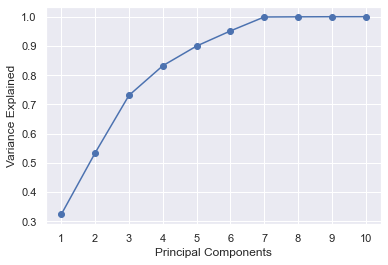

In [235]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [236]:
X_train_pca2 = X_train_pca[:, 0:11]
X_test_pca2 = X_test_pca[:, 0:11]

In [237]:
from sklearn.svm import SVC

In [238]:
estimator_svc = SVC(kernel ='rbf')

In [239]:
estimator_svc.fit(X_train_pca,y_sm)

SVC()

In [ ]:
pred = estimator_svc.predict(X_train_pca)

In [240]:
svm = metrics.accuracy_score(y_sm,pred)

In [241]:
pred2 = estimator_svc.predict(X_test)

/Users/shreyasravi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [242]:
svm1 = metrics.accuracy_score(y_test,pred2)

In [243]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))

Training Accuracy: 0.6365558221917496
Testing Accuracy: 0.48723809523809525


In [244]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.43      0.01      0.01      2685
         1.0       0.49      0.99      0.65      2565

    accuracy                           0.49      5250
   macro avg       0.46      0.50      0.33      5250
weighted avg       0.46      0.49      0.33      5250



### Grid Search for SVM (PCA)

In [245]:
param_pca = {'C': [1,10,100,1000],
              'gamma': [0.001,0.0001,1]}

In [246]:
gs = GridSearchCV(estimator = estimator_svc, param_grid = 
param_pca, cv = 5, n_jobs = -1)

In [247]:
gs.fit(X_train_pca2, y_sm)

/Users/shreyasravi/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001, 1]})

In [248]:
gs.best_estimator_

SVC(C=1000, gamma=1)

In [249]:
pca_new =SVC(C = 1000, gamma = 1)

In [250]:
pca_new.fit(X_train_pca2 ,y_sm)

SVC(C=1000, gamma=1)

In [251]:
pca_new1 = pca_new.predict(X_test_pca2)

In [252]:
print(metrics.classification_report(y_test, pca_new1))

              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75      2685
         1.0       0.75      0.68      0.71      2565

    accuracy                           0.73      5250
   macro avg       0.73      0.73      0.73      5250
weighted avg       0.73      0.73      0.73      5250



## Final Data Visualizations